In [1]:
from sklearn.datasets import load_iris

# Dataset Loading
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

# KNN
## And metrics

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

1.0


In [5]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X, y)
y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


# Spliting dataset to train/test set

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [7]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(metrics.accuracy_score(y_pred, y_test))

0.9333333333333333


In [8]:
scores = []

for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_pred, y_test))

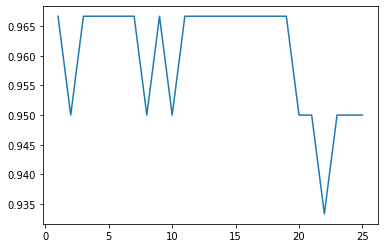

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(range(1,26), scores)


# Digits recognition

In [10]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.model_selection import train_test_split
digits = load_digits()

clf = svm.SVC(gamma=0.001, C=100)
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=2)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

metrics.accuracy_score(y_test, pred)

0.9786839666357738

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelBinarizer
from sklearn import utils
from sklearn import metrics


a = pd.read_csv('~/Downloads/a.csv')
X = a.filter(['reporting_airport', 'origin_destination', 
              'airline_name'])
y = a['average_delay_mins']

reporting_airports = X['reporting_airport']
origin_airports = X['origin_destination']
airports = np.array(pd.DataFrame(list(reporting_airports + origin_airports)).drop_duplicates())

airports_le = LabelBinarizer()

airlines = X['airline_name'].drop_duplicates(keep="first")
airlines_le = LabelBinarizer()

X['reporting_airport'] = airports_le.fit_transform(X['reporting_airport'])
X['origin_destination'] = airports_le.fit_transform(X['origin_destination'])
b = list(X['airline_name'])
print(b)
X['airline_name'] = airlines_le.fit_transform(b)

print(X['airline_name'][50])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=2)

clf = svm.SVC(gamma=0.00001)
              
clf.fit(X_train, y_train.astype(int))
pred = clf.predict(X_test)
metrics.accuracy_score(pred, y_test.astype(int))

['WIZZ AIR', 'WIZZ AIR', 'FLYBE LTD', 'FLYBE LTD', 'BMI REGIONAL', 'FLYBE LTD', 'LOGANAIR LTD', 'ICELANDAIR', 'EASTERN AIRWAYS', 'FLYBE LTD', 'LOGANAIR LTD', 'EASTERN AIRWAYS', 'FLYBE LTD', 'LOGANAIR LTD', 'FLYBE LTD', 'EASYJET AIRLINE COMPANY LTD', 'EASYJET UK LTD', 'BRITISH AIRWAYS PLC', 'FLYBE LTD', 'FLYBE LTD', 'EASYJET AIRLINE COMPANY LTD', 'EASYJET SWITZERLAND', 'EASYJET UK LTD', 'LOGANAIR LTD', 'FLYBE LTD', 'EASTERN AIRWAYS', 'FLYBE LTD', 'BMI REGIONAL', 'FLYBE LTD', 'LOGANAIR LTD', 'EASTERN AIRWAYS', 'FLYBE LTD', 'LOGANAIR LTD', 'FLYBE LTD', 'FLYBE LTD', 'FLYBE LTD', 'FLYBE LTD', 'LOGANAIR LTD', 'FLYBE LTD', 'LOGANAIR LTD', 'SAS', 'BMI REGIONAL', 'FLYBE LTD', 'AIR FRANCE', 'LUFTHANSA', 'FLUGFELAG ISLANDS(AIR ICELAND)', 'ICELANDAIR', 'AER LINGUS', 'KLM', 'KLM CITYHOPPER', 'WIDEROE FLYVESELSKAP A/S', 'EASTERN AIRWAYS', 'BMI REGIONAL', 'SAS', 'SAS', 'WIDEROE FLYVESELSKAP A/S', 'RYANAIR', 'RYANAIR', 'TUI AIRWAYS LTD', 'EASYJET SWITZERLAND', 'FLYBE LTD', 'BRITISH AIRWAYS PLC', 'FLYB

0.35611688954928183

In [12]:
import numpy as np
from scipy import sparse

# Make matrix
matrix = np.array([[2,0,1],
                   [4,5,0]])

matrix_sparse = sparse.csr_matrix(matrix)
print(matrix_sparse) # Matrix without zeros

vector = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(vector[3:6]) # Get values from 4th to 6th place

multiply_by_10 = lambda i: i*10
vectorized_multiply_by_10 = np.vectorize(multiply_by_10)
print(vectorized_multiply_by_10(matrix))# Function that execute on a matrix

print(np.max(matrix))
print(np.min(matrix))

  (0, 0)	2
  (0, 2)	1
  (1, 0)	4
  (1, 1)	5
[3 4 5]
[[20  0 10]
 [40 50  0]]
5
0


# Pandas

In [13]:
import pandas as pd

dataframe = pd.DataFrame()

dataframe['Name'] = ['Jimmy', 'Majster']
dataframe['Age'] = ['12', '34']
dataframe.head()

,Name,Age
0,Jimmy,12
1,Majster,34
